In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minojsos","key":"e1fb51697163fc46b7355c14e76b40af"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets list

ref                                                     title                                         size  lastUpdated          downloadCount  
------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                             416KB  2020-11-10 14:13:28           1671  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                      353MB  2020-11-09 18:51:59           1498  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            325  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University     2MB  2020-11-10 06:07:47            233  
etsc9287/2020-general-election-polls                    2020 General Election Polls                  109KB  2020-02-09 08:20:59   

In [ ]:
! kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:23<00:00, 32.5MB/s]
100% 1.03G/1.03G [00:23<00:00, 47.6MB/s]


In [ ]:
! unzip asl-alphabet.zip -d asl

Streaming output truncated to the last 5000 lines.
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/noth

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import MobileNet, VGG16

In [ ]:
print(os.listdir("asl"))

['asl_alphabet_test', 'asl_alphabet_train']


In [ ]:
train_dir = 'asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl/asl_alphabet_test/asl_alphabet_test'

unique_labels =  ['J', 'nothing', 'I', 'S', 'B', 'D', 'U', 'X', 'K', 'C', 'R', 'N', 'F', 'T', 'space', 'W', 'V', 'L', 'Q', 'O', 'G', 'Z', 'P', 'A', 'M', 'E', 'Y', 'H', 'del']


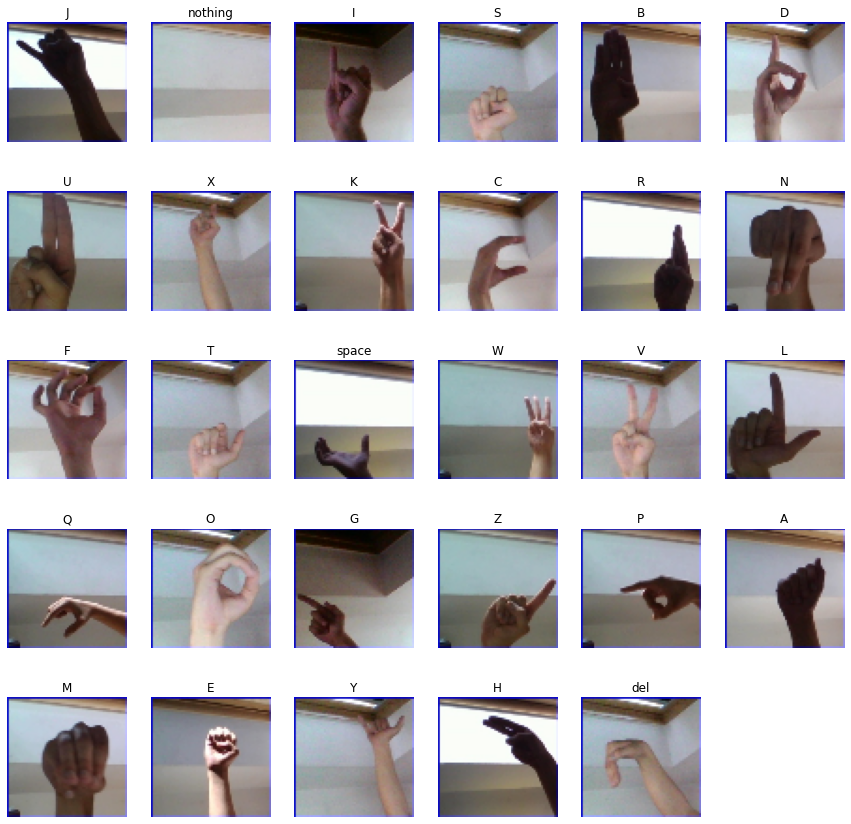

In [ ]:
# Plotting the Images
# Plotting One Image for each of the classes in the datasets - 29 Classes
def load_unique():
    # Image will be resized to 64x64.
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    # Load the images, resize, and store them.
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            # By default images loaded in OpenCV are in BGR. So convert to RGB.
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

# Create an empty plot
fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
# Plot the images that was loaded. One image from each class.
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
# Show the plot.
plt.show()

In [ ]:

# Dictionary to Store all the labels for each of the class.
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

""" 
Load the data to carry out the preprocessin tasks.
Initially the images are loaded from the training directoy only.
These images are loaded, resized to (64,64) and stored in a list which is then 
converted into a Numpy Array. The Array is standardized by dividing it by 225.
The dataset is then split into training and testing sets - Images and Labels.
"""
def load_data():
    images = []
    labels = []
    size = 64,64
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : J | nothing | I | S | B | D | U | X | K | C | R | N | F | T | space | W | V | L | Q | O | G | Z | P | A | M | E | Y | H | del | 
Loaded 82650 images for training, Train data shape = (82650, 64, 64, 3)
Loaded 4350 images for testing Test data shape = (4350, 64, 64, 3)


In [ ]:
"""
Function to create a custom model without the use of Transfer learning.
The model is composed of 3 Convolution Blocks (2 Conv2D Layer following by a 
MaxPooling Layer). Finally a BatchNormalization layer before it is flattened and 
fed into a dense layer for classification.
The Optimizer used is Adam optimizer as it is shown to perform very well.
Accuracy is the metric used to measure class accuracy.
"""
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

"""
Function to create a model based on the VGG 16 architecture that uses Transfer Learning.
Weights learnt on the imagenet dataset is transferred to this model.
In addition to the Base model (VGG16). 
"""
def create_model_tl():
    base_model=VGG16(weights='imagenet',include_top=False, input_shape=(64,64,3)) #imports the mobilenet model and discards the last 1000 neuron layer.
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
    x=Dense(1024,activation='relu')(x) #dense layer 2
    x=Dense(512,activation='relu')(x) #dense layer 3
    preds=Dense(N_CLASSES,activation='softmax')(x) #final layer with softmax activation
    model=Model(inputs=base_model.input,outputs=preds)

    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()

    return model

"""
Train the model using the Training Data.
10% of the data is used to the Validation.
"""
def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)
    return model_hist 

In [ ]:
# Create Transfer Learning Model
model_tl = create_model_tl()

NameError: ignored

In [ ]:
# Compile the Model without Transfer Learning
model = create_model()

MODEL CREATED
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 

In [ ]:
# Fit the Model on the Training Data and use 10% of it for Validation
curr_model_hist = fit_model()

Epoch 1/5
1163/1163 [==============================] - 763s 656ms/step - loss: 0.8538 - accuracy: 0.8228 - val_loss: 0.3535 - val_accuracy: 0.9333
Epoch 2/5
1163/1163 [==============================] - 743s 639ms/step - loss: 0.1838 - accuracy: 0.9788 - val_loss: 0.1897 - val_accuracy: 0.9705
Epoch 3/5
1163/1163 [==============================] - 719s 619ms/step - loss: 0.1637 - accuracy: 0.9819 - val_loss: 0.1671 - val_accuracy: 0.9782
Epoch 4/5
1163/1163 [==============================] - 720s 619ms/step - loss: 0.1369 - accuracy: 0.9878 - val_loss: 0.0830 - val_accuracy: 0.9975
Epoch 5/5
1163/1163 [==============================] - 722s 620ms/step - loss: 0.1458 - accuracy: 0.9863 - val_loss: 0.1407 - val_accuracy: 0.9868


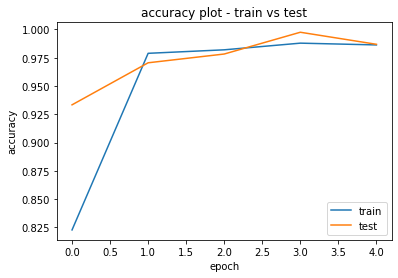

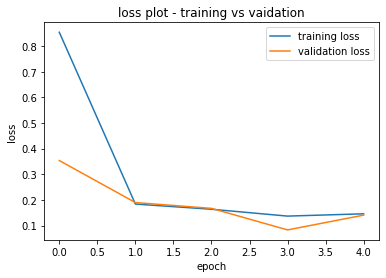

In [ ]:
# Plot the Accuracy vs Epoch graph for both the train and validation test.
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('accuracy plot - train vs validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Plot the Loss vs Epoch graph for both the train and validation test.
plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# Evaluate the Model on the Testing Dataset and get the Evaluation metrics - Loss and Accuracy
evaluation = model.evaluate(X_test, Y_test)
print("\nAccuracy = ", "{:.2f}%".format(evaluation[1]*100),"\nLoss = " ,"{:.6f}".format(evaluation[0]))

136/136 [==============================] - 12s 85ms/step - loss: 0.1407 - accuracy: 0.9862

Evaluation Accuracy =  98.62% 
Evaluation loss =  0.140701


In [ ]:
"""
Load the Images in the Test folder. This will be used as a testing set that is 
not part of the training data.
"""
def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(test_dir):
        temp = cv2.imread(test_dir + '/' + image)
        temp = cv2.resize(temp, size)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [ ]:
# make predictions on an image and append it to the list (predictions).
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_images]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
"""
Get Labels for Plotting
"""
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

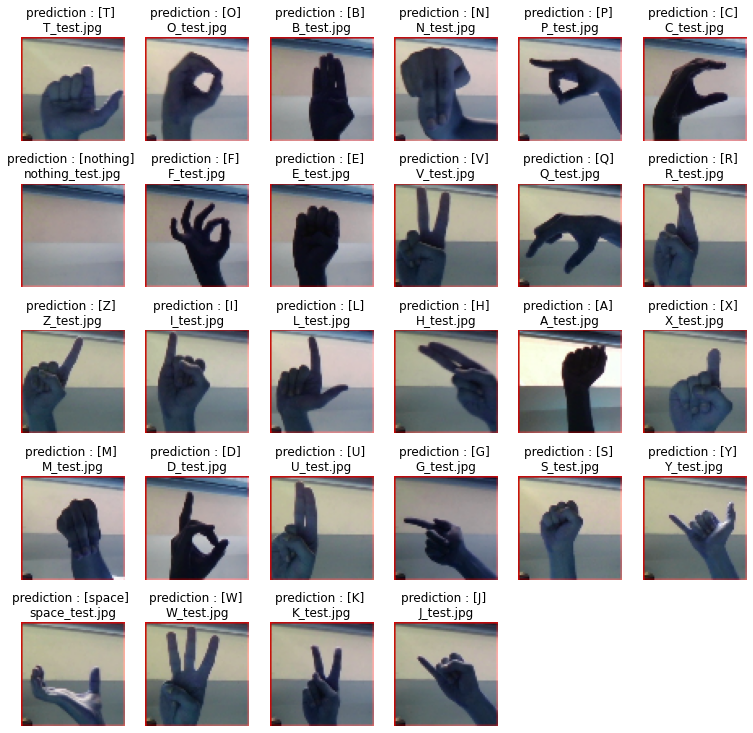

In [ ]:
# Plot the Images from testing 
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
cd asl

/content/drive/My Drive/asl


In [ ]:
# Save the Keras Model
model.save("cstm-model.h5")

In [ ]:
# Save the Weights Model
model.save_weights("cstm-model-weights.h5")